In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("cleaned_data//short_desc.json_exported.csv")
data1.head()

,id,description
0,91,document properties cannot be listed
1,103,layout bug: table cell overflows containing cell
2,104,table saved as text: missing inter-column space
3,105,nested <TABLE>s: bgcolor of inner table not re...
4,133,Navigator draws entities like &lt;&amp;&gt; as...


In [3]:
data2 = pd.read_csv("cleaned_data//severity.json_exported.csv")
data2.head()

,id,severity
0,91,major
1,103,normal
2,104,minor
3,105,normal
4,133,minor


In [4]:
output = pd.merge(data1,data2,on="id",how="inner")
output.head()

,id,description,severity
0,91,document properties cannot be listed,major
1,103,layout bug: table cell overflows containing cell,normal
2,104,table saved as text: missing inter-column space,minor
3,105,nested <TABLE>s: bgcolor of inner table not re...,normal
4,133,Navigator draws entities like &lt;&amp;&gt; as...,minor


In [5]:
output.to_csv("bug_data.csv",index=False)

In [6]:
df = pd.read_csv("bug_data.csv")
df.head()

,id,description,severity
0,91,document properties cannot be listed,major
1,103,layout bug: table cell overflows containing cell,normal
2,104,table saved as text: missing inter-column space,minor
3,105,nested <TABLE>s: bgcolor of inner table not re...,normal
4,133,Navigator draws entities like &lt;&amp;&gt; as...,minor


In [7]:
df.shape
df.dtypes
df['description'] = df['description'].astype('str')

In [8]:
#remove null values
df = df.dropna()
df.dtypes

id              int64
description    object
severity       object
dtype: object

In [9]:
df.severity.value_counts()

normal         272522
major           35899
critical        31953
enhancement     23424
minor           19451
trivial          7716
blocker          3694
Name: severity, dtype: int64

In [35]:
df['severity_num'] = df.severity.map({'minor':0,'normal':1,'major':2,'critical':3,'blocker':4,'trivial' : 5, 'enhancement' : 6})
# df['severity_num'] = df.severity.map({'minor':0,'normal':1,'major':2,'critical':3,'blocker':4})

# df['severity_num'] = df.severity.map({'minor':0,'normal':1,'major':2,'critical':3})



In [36]:
#df = df.sort_values(by='severity_num')
df.head(10)


,id,description,severity,severity_num
1,103,layout bug: table cell overflows containing cell,normal,1
3,105,nested <TABLE>s: bgcolor of inner table not re...,normal,1
9,220,Incorrect display of CP-1250 pages in Unix ver...,normal,1
13,264,Fails to complie due to having wrong include,normal,1
21,346,"Missing ""&"" in parameter, cmd/xfe/forms.c:2116",normal,1
34,432,PowerBuilder plugin causes random page fault e...,normal,1
35,433,Page fault error created when Netscape launche...,normal,1
37,436,Doesn't display some GIFs,normal,1
38,438,Incorrect anonymous FTP login,normal,1
47,453,"OnKeyUp event is not stable, sometimes not fire",normal,1


In [37]:
#df = df.iloc[22690:]

In [38]:
df.severity.value_counts()

normal      272522
major       272522
critical    272522
minor       272522
blocker     272522
Name: severity, dtype: int64

In [39]:
df_normal = df[df.severity_num==1]
df_major = df[df.severity_num==2]
df_critical = df[df.severity_num==3]
df_minor = df[df.severity_num==0]
df_blocker = df[df.severity_num==4]
# df_trivial = df[df.severity_num==5]
# df_enhancement = df[df.severity_num==6]

In [40]:
from sklearn.utils import resample
def resample_df(df):
    return resample(df,replace=True,n_samples=272522,random_state=123)


df_major = resample_df(df_major)
df_critical = resample_df(df_critical)
df_minor = resample_df(df_minor)
df_blocker = resample_df(df_blocker)
# df_trivial = resample_df(df_trivial)
# df_enhancement = resample_df(df_enhancement)

# df = pd.concat([df_normal,df_major,df_critical,df_minor,df_blocker,df_trivial,df_enhancement])
df = pd.concat([df_normal,df_major,df_critical,df_minor,df_blocker])


df.severity.value_counts()


normal      272522
major       272522
critical    272522
minor       272522
blocker     272522
Name: severity, dtype: int64

In [41]:
#define x as bug description and y as the severity
x = df.description
y = df.severity_num
print(x)
print(y)

1          layout bug: table cell overflows containing cell
3         nested <TABLE>s: bgcolor of inner table not re...
9         Incorrect display of CP-1250 pages in Unix ver...
13            Fails to complie due to  having wrong include
21           Missing "&" in parameter, cmd/xfe/forms.c:2116
                                ...                        
151042    Current trunk builds have no bookmarks, too lo...
10522          Compilation error in GtkMozillaContainer.cpp
109859    The browser does not allow you to refresh a pa...
87576     Build is crashing while compiling nsCSSRenderi...
90986                        Crash on Print in print dialog
Name: description, Length: 1362610, dtype: object
1         1
3         1
9         1
13        1
21        1
         ..
151042    4
10522     4
109859    4
87576     4
90986     4
Name: severity_num, Length: 1362610, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)


In [43]:
#instantiate the vectorizer
vect = CountVectorizer()

In [44]:
vect.fit(x_train)
x_train_dtm = vect.transform(x_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)

In [45]:
x_test_dtm = vect.transform(x_test)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [46]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()



In [47]:
%time nb.fit(x_train_tfidf, y_train)



CPU times: user 402 ms, sys: 35.8 ms, total: 438 ms
Wall time: 446 ms


MultinomialNB()

In [48]:
y_pred_class = nb.predict(x_test_tfidf)

In [49]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.6185739132987429

In [50]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_class)
conf_mat

array([[39731,  3791,  7557,  1343,  2077],
       [15024, 19013, 11850,  4501,  4048],
       [10468,  4488, 30978,  4050,  4407],
       [ 3183,  2302,  7622, 37570,  3936],
       [ 3247,  1183,  5851,  3019, 41283]])

In [51]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['minor','normal','major','critical','blocker'])
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['normal','minor','major','critical'])

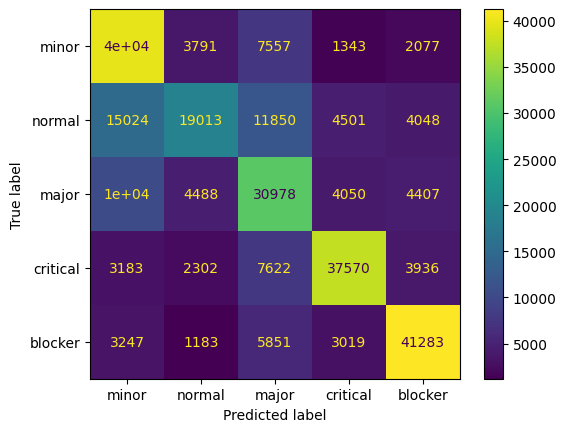

In [52]:
cm_display.plot()
plt.show()


In [53]:
ip = ["application fails to launch"]


In [54]:
ip_dtm = vect.transform(ip)
ip_tfidf = tfidf_transformer.transform(ip_dtm)

In [55]:
nb.predict(ip_tfidf)

array([4])

In [ ]:
#save the model, count vectorizer and tfidf in plain file to be used later for prediction

# import pickle
# pickle.dump(nb, open('model.pkl', 'wb'))
# pickle.dump(vect, open('vect.pkl', 'wb'))
# pickle.dump(tfidf_transformer, open('tfidf_transformer.pkl', 'wb'))

